# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# import pandas and read in the csv file for human body temperature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<p> The dataset has three variables for every record: the person's temperature, gender, and heart rate. The pertinent variable for this notebook will mainly be the temperature, although the gender column will also be analyzed.

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Is the distribution of body temperatures normal?

<p> Although this is not a requirement for CLT to hold , it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

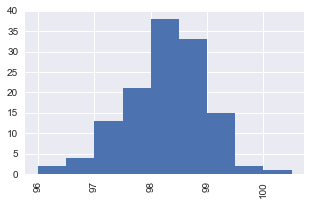

In [4]:
sns.set()
plt.figure(figsize=(5,3))
bin_edges = np.arange(96, 101, step = 0.5)
plt.hist(df['temperature'], bins=bin_edges)
plt.xticks(rotation=90)
plt.show()

<p> An initial impression is that this distribution looks roughly normal. However, scipy's stats.normaltest will be used to confirm the normality of the distribution.

In [5]:
k2, p = stats.normaltest(df['temperature'])
print(k2, p)

2.70380143332 0.258747986349


<p> Typically, a p-value less than 0.05 indicates that a distribution is very unlikely to be normal. Because the p-value is much greater than 0.05, this distribution is likely normal.

## Is the sample size large? Are the observations independent?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


<p> There are a total of 130 observations in this DataFrame, which is generally considered large. The observations in the sample are measurements from different people and are independent.

## Is the true population mean really 98.6 degrees F?

<ul>
<li>Would you use a one-sample or two-sample test? Why?
<li>In this situation, is it appropriate to use the  tt  or  zz  statistic?
<li>Now try using the other test. How is the result be different? Why?
</ul>

In [7]:
# declare global variables to store summary statistics from the sample
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
samplesize = len(df['temperature'])
samplesize_sqrt = np.sqrt(samplesize)

# write a function which performs a one-sample t-test

def t_test(sample, pop_mean):
    """Computes the t-value for a sample, and the p-value"""    
    t_value = (sample_mean - pop_mean) / (sample_std / samplesize_sqrt)
    p_value = stats.t.sf(np.abs(t_value), samplesize-1) * 2
    return t_value, p_value


# perform t-test on the sample
t, p = (t_test(df['temperature'], 98.6))
print('t-value: ', t) 
print('p-value: ', p)

t-value:  -5.47592520208
p-value:  2.18874646241e-07


<p> A one-sample test is used as we are trying to test the mean human temperature from a sample group against the mean temperature of the population. Although the sample size is large enough for a z-test, only the standard deviation of the sample is known, so a t-test is performed. The p-value is computed as well. 

The probability of obtaining a t_value of -5.47 is 0.00000022, making it highly unlikely that the population mean is really 98.6 degrees F. Therefore, we can reject the null hypothesis that the sample is derived from a population where the mean temperature is 98.6 degrees F.


## Draw a small sample of size 10 from the data and repeat both tests.

<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [8]:
small_sample = np.random.choice(df['temperature'], 10)

t2, p2 = (t_test(small_sample, 98.6))
print('t-value: ', t2) 
print('p-value: ', p2)


t-value:  -5.47592520208
p-value:  2.18874646241e-07


<p> For such a small sample size, a t-test should be used whether or not the population's standard deviation is known. The t-value once again suggests that it is highly unlikely that the sample came from a population with a mean temperature of 98.6 degrees.

## At what temperature should we consider someone's temperature to be "abnormal"?

<ul>
    <li> Start by computing the margin of error and confidence interval.
</ul>

In [9]:
# write a function to determine margin of error

def margin_of_error(sample):
    """Determines the margin of error for a 95% confidence interval."""
    moe = 1.96 * (sample_std/samplesize_sqrt)
    return moe


sample_moe = margin_of_error(df['temperature'])

# to calculate the confidence interval, we add and subtract the margin of error to the sample mean

confidence_interval = [sample_mean - sample_moe, sample_mean + sample_moe]

print(confidence_interval)

[98.123679804428193, 98.374781734033363]


A 95% confidence interval for the sample includes temperatures between 98.12 to 98.37 degrees F. This means that a temperature of 98.6 degrees would actually be abnormal.

## Is there a significant difference between males and females in normal temperature?

<ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

In [10]:
# create 2 different dataframes, one for males and one for females
df_female = df[df.gender == 'F']
df_male = df[df.gender == 'M']

# define a function for a two-sample t-test for equal means

def two_t_test(sample1, sample2):
    """Performs a two-sample t-test for the hypothesis that the means are equal"""
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    size1 = len(sample1)
    size2 = len(sample2)
    t_value = (mean1 - mean2) / np.sqrt(std1**2/size1 + std2**2/size2)
    p_value = stats.t.sf(np.abs(t_value), min(size1, size2)) * 2
    return t_value, p_value

# perform two-sample t-test on the samples

t2, p2 = two_t_test(df_female['temperature'], df_male['temperature'])

print('t-value: ', t2)
print('p-value: ', p2)

t-value:  2.30322028919
p-value:  0.0244752530052


<p> Here, a two-sample test is used as we are testing the means of two different populations against each other. The null hypothesis is that the two means are equal. 

The resulting p-value is 0.024, which is significantly smaller than 0.05, indicating that there is actually a significant difference between the mean temperatures for the two populations, and the null hypothesis can be rejected.